# House Prices Predictions Assignment

Assignment Summary:

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The company is looking at prospective properties to buy to enter the market.
You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

Business Objective:

• Which variables are significant in predicting the price of a house.
• How well those variables describe the price of a house.
• Also, determine the optimal value of lambda for ridge and lasso regression.

Goals of Model-Building:

1. To understand how exactly the prices vary with the variables.
2. To manipulate the management to understand the pricing dynamics of a new market.


In [1]:
# Import Python Libraries for data manipulations, analysis and visualisations
import numpy as np
import pandas as pd
import calendar
import matplotlib.pyplot as plt
import seaborn as sns

# Import statsmodels library and its required modules for model building, analysis and evaluation
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Import sklearn library and its required modules for model building, analysis and evaluation
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Import warnings library and filter Warnings of 'ignore' type
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 500, 'display.max_columns', 250)

## Checkpoint 1: Reading and Understanding the Data

In [2]:
# Load the file into a dataframe
house_prices_df = pd.read_csv('train.csv')

In [3]:
# Check the observations present in the dataframe:
house_prices_df.shape

(1460, 81)

In [4]:
# Understand the column-data-types and distribution of missing/null values
house_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# Have a look at the data present in each of the columns
house_prices_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
# Get a sense of distribution of values in each of the columns
house_prices_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Understandings obtained from the data:


1. Based upon the details provided in the data-dictionary and the values seen in the data-set, we may classify all the variables into the following data-types:-

###### Numeric/Continuous Variables:

    Id
    LotFrontage
    LotArea
    YearBuilt
    YearRemodAdd
    MasVnrArea
    BsmtFinSF1
    BsmtFinSF2
    BsmtUnfSF
    TotalBsmtSF
    1stFlrSF
    2ndFlrSF
    LowQualFinSF
    GrLivArea
    BsmtFullBath
    BsmtHalfBath
    FullBath
    HalfBath
    BedroomAbvGr
    KitchenAbvGr
    TotRmsAbvGrd
    Fireplaces
    GarageYrBlt
    GarageCars
    GarageArea
    WoodDeckSF
    OpenPorchSF
    EnclosedPorch
    3SsnPorch
    ScreenPorch
    PoolArea
    MiscVal
    MoSold
    YrSold
    SalePrice

###### Categorical-Variables:

    MSSubClass
    MSZoning
    Street
    Alley
    LotShape
    LandContour
    Utilities
    LotConfig
    LandSlope
    Neighborhood
    Condition1
    Condition2
    BldgType
    HouseStyle
    OverallQual
    OverallCond
    RoofStyle
    RoofMatl
    Exterior1st
    Exterior2nd
    MasVnrType
    ExterQual
    ExterCond
    Foundation
    BsmtQual
    BsmtCond
    BsmtExposure
    BsmtFinType1
    BsmtFinType2
    Heating
    HeatingQC
    CentralAir
    Electrical
    KitchenQual
    Functional
    FireplaceQu
    GarageType
    GarageFinish
    GarageQual
    GarageCond
    PavedDrive
    PoolQC
    Fence
    MiscFeature
    SaleType
    SaleCondition


2. The following variables look like numeric-variables, but according to the data-dictionary, they are actually supposed to be treated as categorical variables:-
      
       MSSubClass
       OverallQual
       OverallCond
    
    

3. The 'Id' column contains all unique values, which wouldn't contribute anything in our analysis and model-predictions


## Checkpoint 2: Reformatting and Cleaning the data (for effective visualisation)

In order to enhance clarity in visualisation during EDA, we can reformat the data and extract crisp results. This would help in more deriving more confident conclusions further.

(This is not a mandatory step before EDA and can be done after EDA as well but we decided to take care of these before EDA, as it would aid making the plots more readable/clearer).

So, we choose to perform the following activities before Exploratory Data Analysis:

1. Drop unnecessary columns which can be easily identified as not contributing anything to the target-variable

2. Rename the columns to appropriate-names for better readability, if required

3. Change the data-types of categorical-columns to 'category'

4. Replace(Map) the numeric-values in the Categorical-columns with the string(categorical)-values for an easy grasp, from the data-dictionary and datatime/calendar libraries

5. Treat null-values by either imputing them if possible or dropping the columns with a very high percentage of null-values.

After this the plots used in EDA would present a certain and to the point picture of distributions and correlations.


In [7]:
# Check if the data-types of the columns are consistent with the values they contain
house_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

We get the following observations by comparing the above column-details with the data-values viewed earlier:-

1. The 'Id' column wouldn't contribute anything in our analysis and model-predictions, as observed during reading and understanding the data, so it can be dropped
2. The 'MSSubClass', 'OverallQual', 'OverallCond' columns represent categorical-data in the form of numbers, so their data-type needs to be changed to 'category'

#### Removing redundant columns

In [8]:
# Drop the redundant & unwanted columns
house_prices_df = house_prices_df.drop(columns=['Id'])
house_prices_df.shape

(1460, 80)

#### Reassigning the appropriate data-types to categorical-columns

In [9]:
# Convert to columns containing categorical-data to 'object' (preferred here, as most other categorical-columns are Object-type) or 'category' data type
house_prices_df['MSSubClass']=house_prices_df['MSSubClass'].astype(object)
house_prices_df['OverallQual']=house_prices_df['OverallQual'].astype(object)
house_prices_df['OverallCond']=house_prices_df['OverallCond'].astype(object)

#### Renaming the columns to appropriate-names

We see that almost all the columns as of now are appropriately named, so we do not need to rename them.

#### Converting the numeric-values to categorical-values for Categorical-columns

We can see that the numeric values are present in the categorical-columns: 'MSSubClass', 'OverallQual', 'OverallCond', but as they can be inferred as being ordinal in nature, we choose, not to map them to string-values as they would anyway be required to be converted in to numeric-form while building the model. 

#### Check for data-quality (missing values, duplicate records):

In [10]:
# Calculate the percentage of null-values for each column, and display top-20 columns with highest null-values
round(((house_prices_df.isnull().sum())/(len(house_prices_df.index)))*100, 2).sort_values(ascending=False).head(20)

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageType       5.55
GarageCond       5.55
GarageFinish     5.55
GarageQual       5.55
GarageYrBlt      5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
RoofMatl         0.00
dtype: float64

The columns with very high null-value percentage are not going to impact the target-variable 'SalePrice' significantly. So we choose to drop the columns with null-values percentage greater thatn 80%.

Also, we see that some columns which show a very high percentage of null-values actually do not contain null-values, but they are categorical-columns, for which 'NA' or 'None' is a legitimate category, as per the data-dictionary. So, we will first convert such 'NA' values to a relevant category within each such column.

In [11]:
# Converting the NA values for each categorical-column wherein NA or None has meaningful relevance as per data-dictionary:
columnsToImpute = ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
house_prices_df[columnsToImpute] = house_prices_df[columnsToImpute].fillna(value='None') 

In [12]:
# Calculate the percentage of null-values for each column again
round(((house_prices_df.isnull().sum())/(len(house_prices_df.index)))*100, 2).sort_values(ascending=False).head(20)

LotFrontage     17.74
GarageYrBlt      5.55
MasVnrArea       0.55
Electrical       0.07
SalePrice        0.00
Foundation       0.00
RoofMatl         0.00
Exterior1st      0.00
Exterior2nd      0.00
MasVnrType       0.00
ExterQual        0.00
ExterCond        0.00
BsmtCond         0.00
BsmtQual         0.00
BsmtExposure     0.00
BsmtFinType1     0.00
BsmtFinSF1       0.00
BsmtFinType2     0.00
BsmtFinSF2       0.00
BsmtUnfSF        0.00
dtype: float64

Now we are left with only the 3 numeric-variables and 1 categorical-variable with null values:

    LotFrontage
    GarageYrBlt
    MasVnrArea
    Electrical
    
Since the percentage of null-values in these columns are very small, we decide to impute them, instead of dropping them.


In [13]:
# Fill the null-values in LotFrontage and MasVnrArea with median values
house_prices_df['LotFrontage'] = house_prices_df['LotFrontage'].fillna((house_prices_df['LotFrontage'].median()))
house_prices_df['MasVnrArea'] = house_prices_df['MasVnrArea'].fillna((house_prices_df['MasVnrArea'].median()))

In [14]:
# Fill the GarageYrBlt value with YearBuilt value if the house has a garage, else fill the value with 0 (zero)
def fill_GarageYrBlt(row):
    if row['GarageType'] == 'None':
        return 0
    else:
        return row['YearBuilt']

house_prices_df['GarageYrBlt'] = house_prices_df.apply(lambda row:fill_GarageYrBlt(row), axis=1)


In [15]:
house_prices_df['Electrical'] = house_prices_df['Electrical'].fillna((house_prices_df['Electrical'].mode()[0]))

In [16]:
# Calculate the percentage of null-values for each column again
round(((house_prices_df.isnull().sum())/(len(house_prices_df.index)))*100, 2).sort_values(ascending=False).head(20)

SalePrice        0.0
SaleCondition    0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
RoofStyle        0.0
dtype: float64

If a categorical-column contains only one dominant-class which occupies most of the column, then that variable would not affect our target variable much, as it majorly contains only one type of value. Therefore such categorical variables can be ignored.


So, now that all the null-vaues have been imputed, we would now take a look at the class distribution in all the categorical variables and drop those which have 90% or more distribution of the same class.

In [17]:
# See, if any categorical-variable contains 90% or more distribution of a single class

categorical_cols = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

for x in categorical_cols:
    print(house_prices_df[x].value_counts())

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Pave    1454
Grvl       6
Name: Street, dtype: int64
None    1369
Grvl      50
Pave      41
Name: Alley, dtype: int64
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel 

As seen from the above details, the following categorical-columns contain 90% or more distribution of a single class:

    Street
    Alley
    Utilities
    LandSlope
    Condition2
    RoofMatl
    Heating
    CentralAir
    Electrical
    Functional
    GarageCond
    PavedDrive
    PoolQC
    MiscFeature

(Here, 1460 are the total rows in our data-set, so 90% of it is 1314, which is our threshold for identifying the significance of impact of the column on target variable.)

So, we will now go ahead and drop these insignificant columns.

In [18]:
# Drop the categorical-columns with 90% or more distribution of a single-class
house_prices_df = house_prices_df.drop(columns=['Street', 'Alley', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageCond', 'PavedDrive', 'PoolQC', 'MiscFeature'])
house_prices_df.shape

(1460, 66)

In [19]:
# Check for duplicate-records
house_prices_df.duplicated().value_counts()

False    1460
dtype: int64

In [20]:
# Have a look at the data-values after cleaning has been done
house_prices_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Reg,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,Ex,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,None,Attchd,2003,RFn,2,548,TA,0,61,0,0,0,0,None,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Reg,Lvl,FR2,Veenker,Feedr,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,Ex,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,TA,Attchd,1976,RFn,2,460,TA,298,0,0,0,0,0,None,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,IR1,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,Ex,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,TA,Attchd,2001,RFn,2,608,TA,0,42,0,0,0,0,None,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,IR1,Lvl,Corner,Crawfor,Norm,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,Gd,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Gd,Detchd,1915,Unf,3,642,TA,0,35,272,0,0,0,None,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,IR1,Lvl,FR2,NoRidge,Norm,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,Ex,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,TA,Attchd,2000,RFn,3,836,TA,192,84,0,0,0,0,None,0,12,2008,WD,Normal,250000


We get the following observations from the above details:-

1. There are no null-values in the data-set
2. There are no categorical-columns which majorly (90% or more) contain a single class
3. There are no duplicate records in the data-set

### Feature Engineering (using Derieved Variables) demonstration (examples only):

We can create some  new features that might be useful for this analysis as below. So created new features from year related variables, to express the age of the house and house-components which is a better persepective for the analysis:

In [21]:
# Converting dates related columns specifying date-year to number od years from today
house_prices_df['Age_YearsBuilt'] = pd.datetime.now().year - house_prices_df['YearBuilt']
house_prices_df['Age_YearsRemodAdd'] = pd.datetime.now().year - house_prices_df['YearRemodAdd']
house_prices_df['Age_GarageBlt'] = pd.datetime.now().year - house_prices_df['GarageYrBlt']
house_prices_df['Age_YearsSold'] = pd.datetime.now().year - house_prices_df['YrSold']

In [22]:
# Have a look at the date (year) columns and the values in the derived-columns
house_prices_df[['YearBuilt','Age_YearsBuilt','YearRemodAdd','Age_YearsRemodAdd','GarageYrBlt','Age_GarageBlt', 'YrSold','Age_YearsSold']].head(10)

,YearBuilt,Age_YearsBuilt,YearRemodAdd,Age_YearsRemodAdd,GarageYrBlt,Age_GarageBlt,YrSold,Age_YearsSold
0,2003,18,2003,18,2003,18,2008,13
1,1976,45,1976,45,1976,45,2007,14
2,2001,20,2002,19,2001,20,2008,13
3,1915,106,1970,51,1915,106,2006,15
4,2000,21,2000,21,2000,21,2008,13
5,1993,28,1995,26,1993,28,2009,12
6,2004,17,2005,16,2004,17,2007,14
7,1973,48,1973,48,1973,48,2009,12
8,1931,90,1950,71,1931,90,2008,13
9,1939,82,1950,71,1939,82,2008,13


In [23]:
# Drop the redundant & unwanted columns
house_prices_df = house_prices_df.drop(columns=['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'])
house_prices_df.shape

(1460, 66)

In [24]:
# Have a look at the column-names and data-types after reforamtting has been done
house_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 66 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MSSubClass         1460 non-null   object 
 1   MSZoning           1460 non-null   object 
 2   LotFrontage        1460 non-null   float64
 3   LotArea            1460 non-null   int64  
 4   LotShape           1460 non-null   object 
 5   LandContour        1460 non-null   object 
 6   LotConfig          1460 non-null   object 
 7   Neighborhood       1460 non-null   object 
 8   Condition1         1460 non-null   object 
 9   BldgType           1460 non-null   object 
 10  HouseStyle         1460 non-null   object 
 11  OverallQual        1460 non-null   object 
 12  OverallCond        1460 non-null   object 
 13  RoofStyle          1460 non-null   object 
 14  Exterior1st        1460 non-null   object 
 15  Exterior2nd        1460 non-null   object 
 16  MasVnrType         1460 

In [25]:
# Have a look at the data-values after cleaning has been done
house_prices_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,Age_YearsBuilt,Age_YearsRemodAdd,Age_GarageBlt,Age_YearsSold
0,60,RL,65.0,8450,Reg,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,Ex,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,None,Attchd,RFn,2,548,TA,0,61,0,0,0,0,None,0,2,WD,Normal,208500,18,18,18,13
1,20,RL,80.0,9600,Reg,Lvl,FR2,Veenker,Feedr,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,Ex,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,TA,Attchd,RFn,2,460,TA,298,0,0,0,0,0,None,0,5,WD,Normal,181500,45,45,45,14
2,60,RL,68.0,11250,IR1,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,Ex,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,TA,Attchd,RFn,2,608,TA,0,42,0,0,0,0,None,0,9,WD,Normal,223500,20,19,20,13
3,70,RL,60.0,9550,IR1,Lvl,Corner,Crawfor,Norm,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,Gd,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Gd,Detchd,Unf,3,642,TA,0,35,272,0,0,0,None,0,2,WD,Abnorml,140000,106,51,106,15
4,60,RL,84.0,14260,IR1,Lvl,FR2,NoRidge,Norm,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,Ex,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,TA,Attchd,RFn,3,836,TA,192,84,0,0,0,0,None,0,12,WD,Normal,250000,21,21,21,13


Now, we have a data-set with non-redundant, appropriately named columns and data-types consistent with the information each column represents, as well as the categorical-columns with appropriate class distribution (each class having less than 90% presence in the column) have been shortlisted.

So, we can go ahead with Explorartory Data Analysis on this reformatted and cleaned data-set.

## Checkpoint 3: Visualising the Data (EDA)

Now we will visualise the data and see the various plots between each pair of predictor and target variables to conclude if creating a linear regression model actually makes sense for it.

In [26]:
# Define the final set of numerical and categorical variables as well as the target variable

numerical_vars = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'Age_YearsBuilt', 'Age_YearsRemodAdd', 'Age_GarageBlt', 'Age_YearsSold']

categorical_vars = ['MSSubClass', 'MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'Fence', 'SaleType', 'SaleCondition']

target_var = 'SalePrice'


#### Visualising the target-variable:-

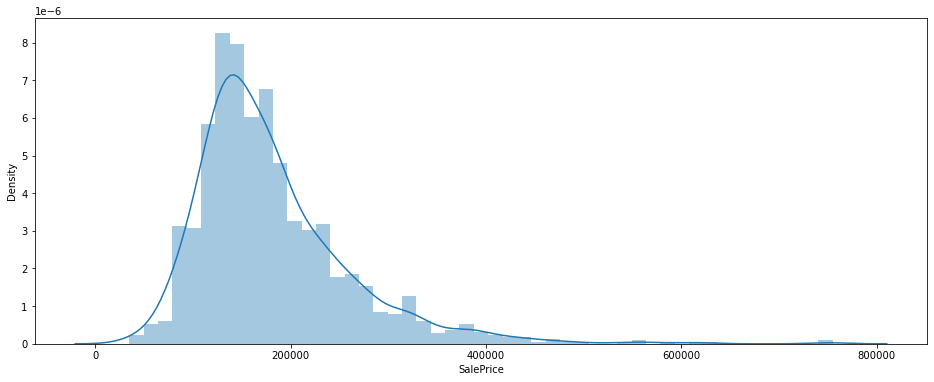

In [27]:
# Analyse the distribution of our target variable to see if it's normally distributed
plt.figure(figsize=(16,6))
sns.distplot(house_prices_df['SalePrice'])
plt.show()

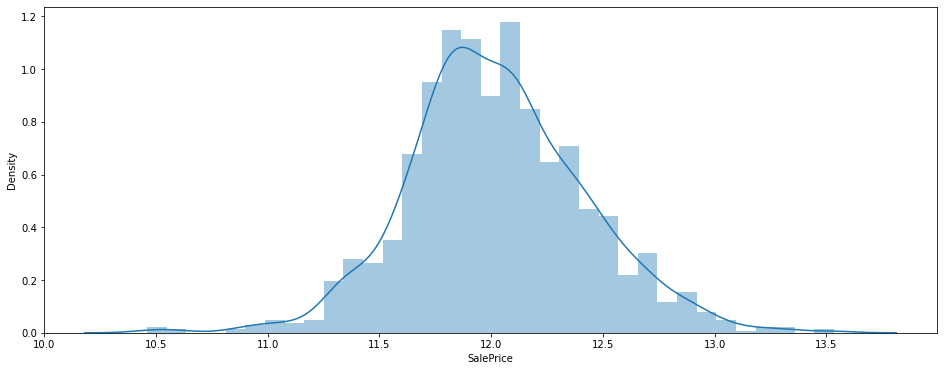

In [28]:
# Check if the log-transformation eliminates the right skewedness
plt.figure(figsize=(16,6))
sns.distplot(np.log((house_prices_df['SalePrice'])))
plt.show()

As the linear-models require normally distributed data, the log-transformation of this target-variable is a better approach to model-building since it handles the skewedness in the distribution. 

#### Visualising the numeric variables:-

<Figure size 432x288 with 0 Axes>

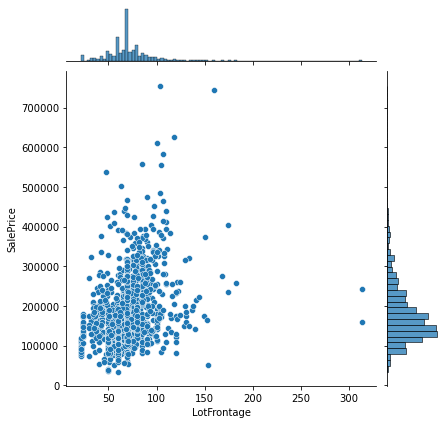

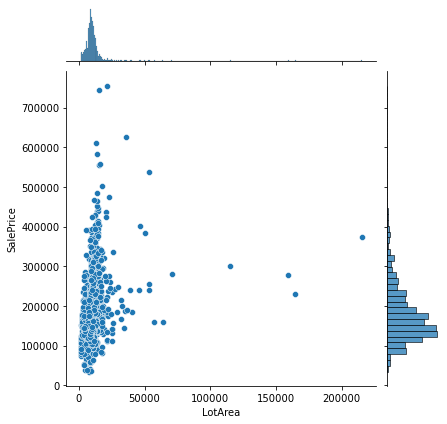

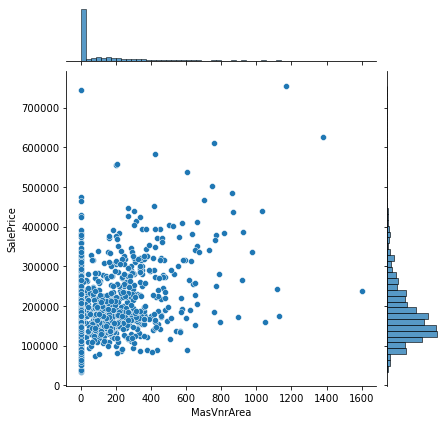

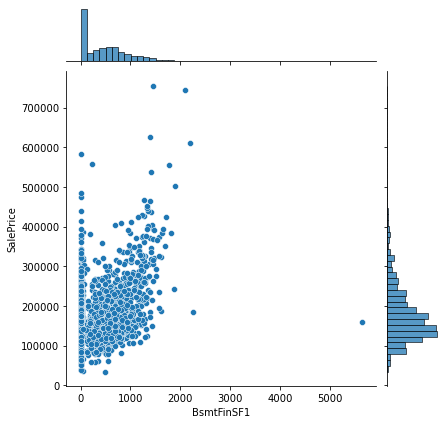

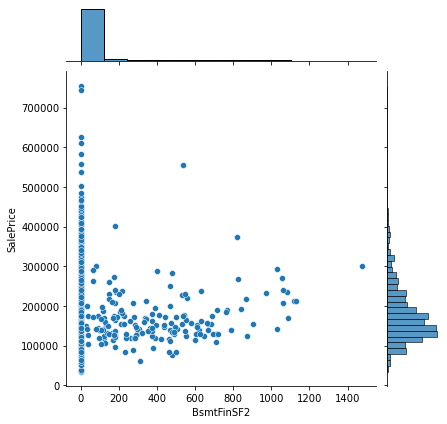

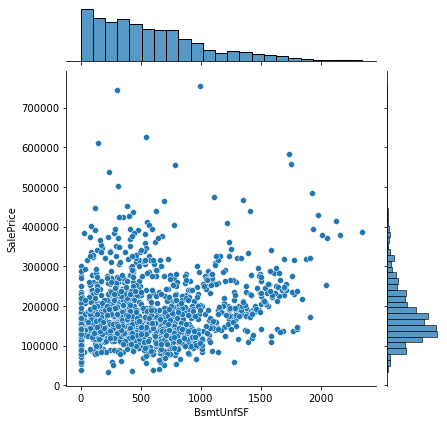

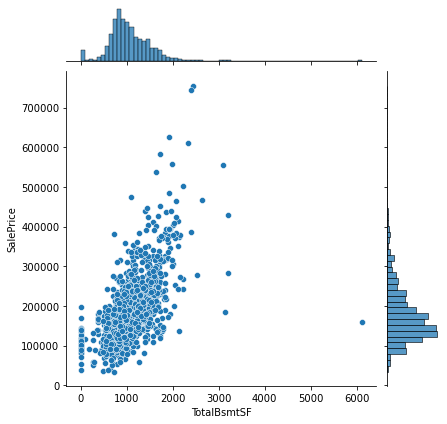

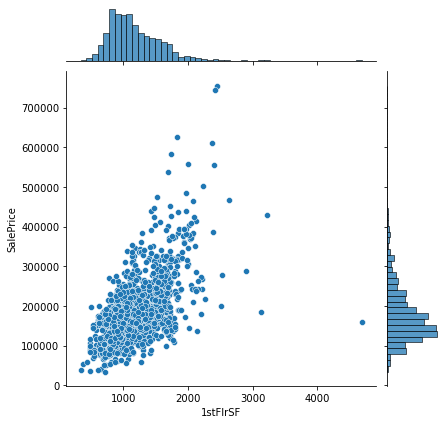

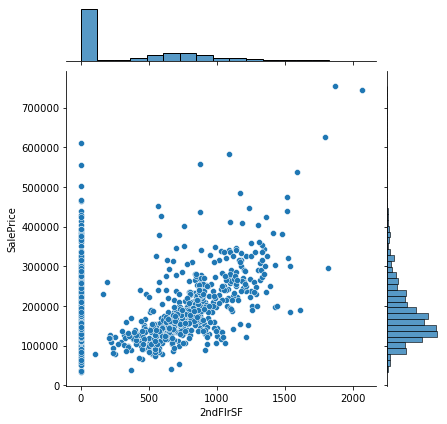

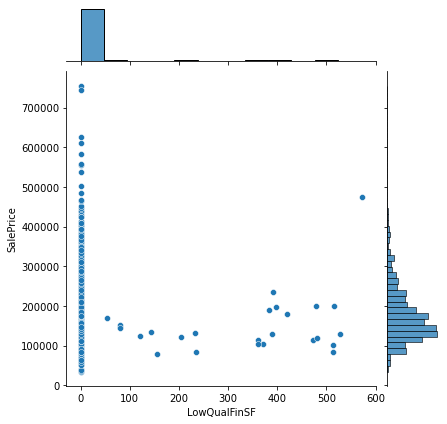

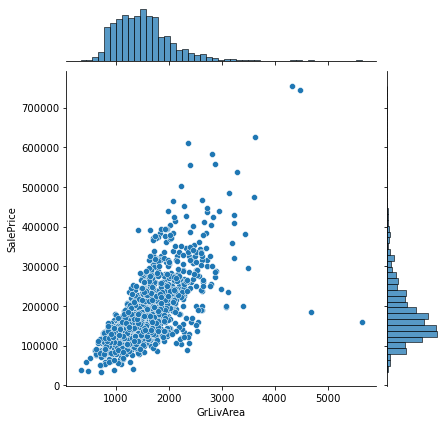

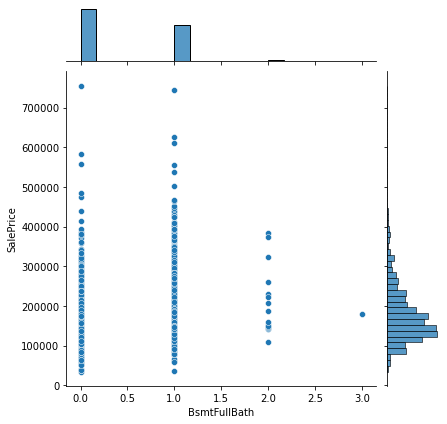

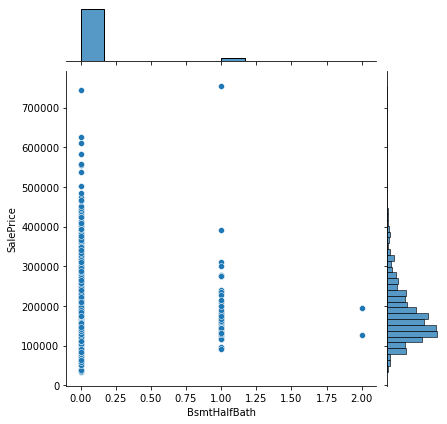

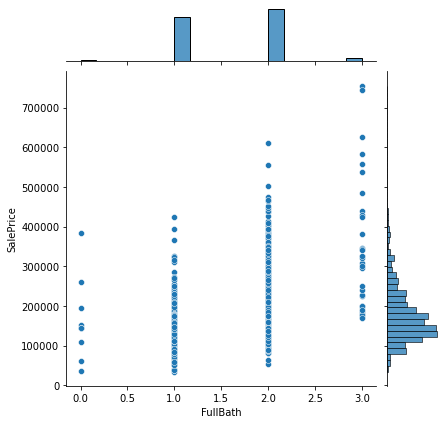

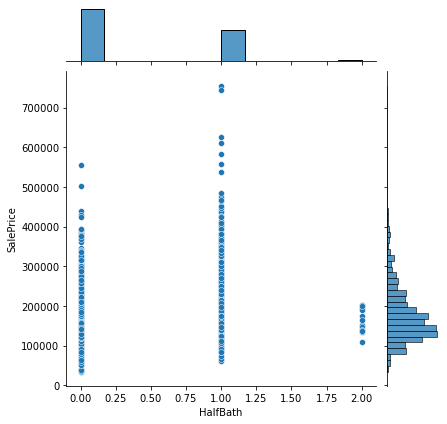

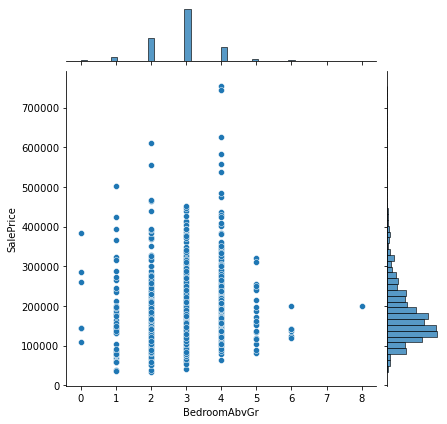

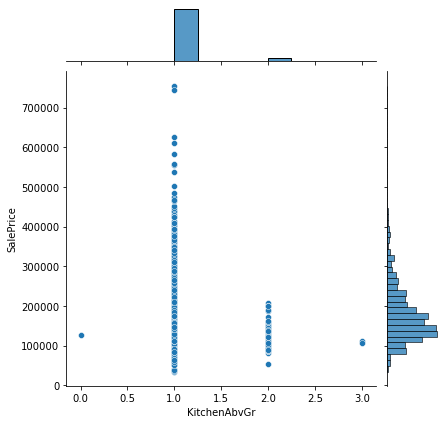

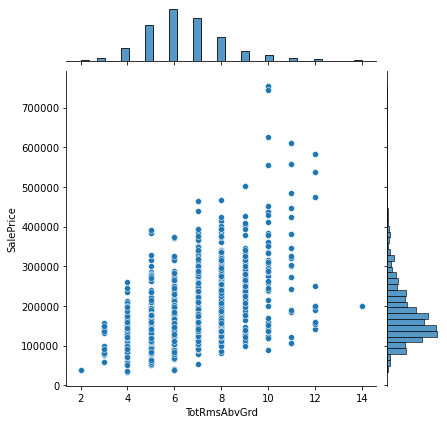

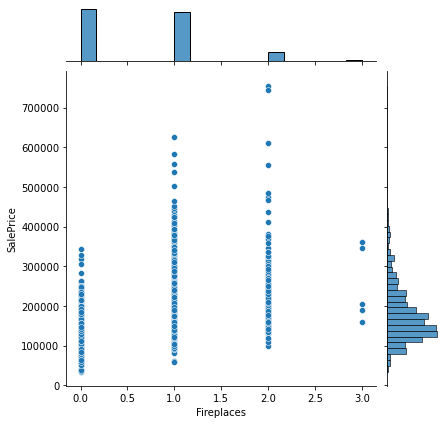

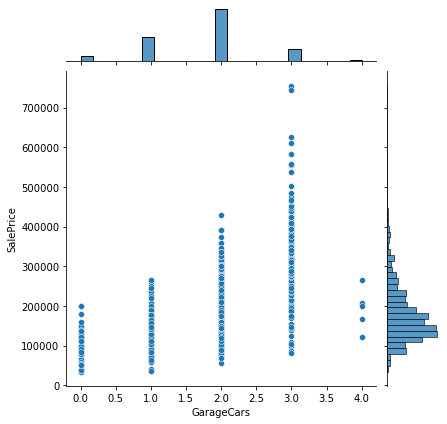

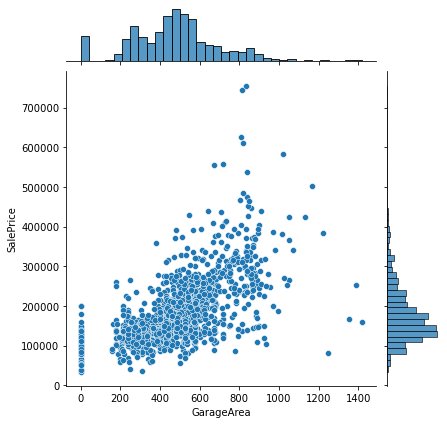

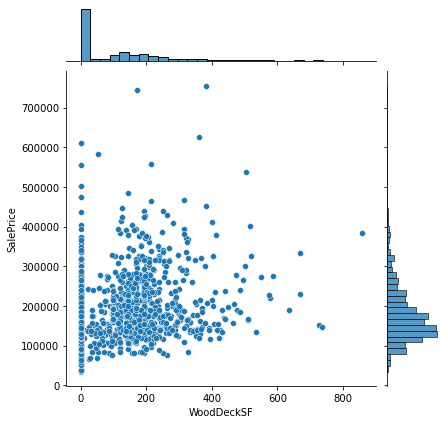

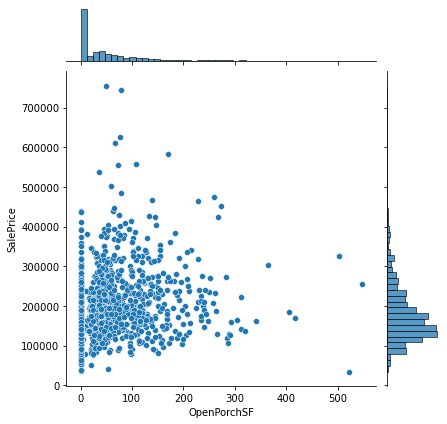

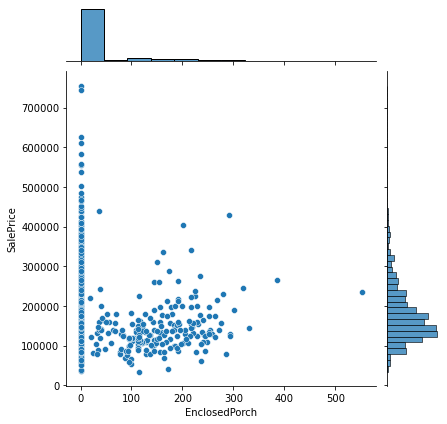

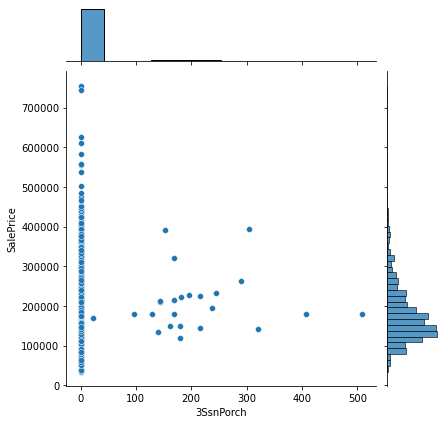

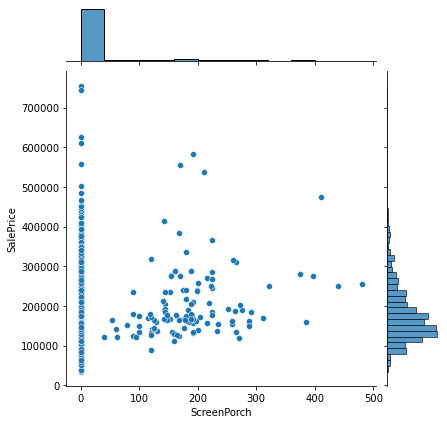

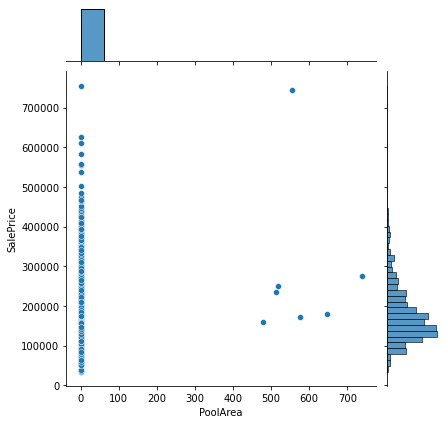

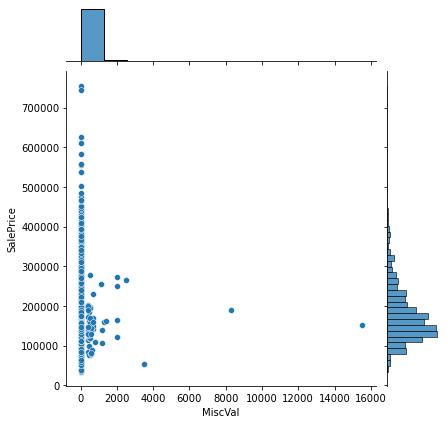

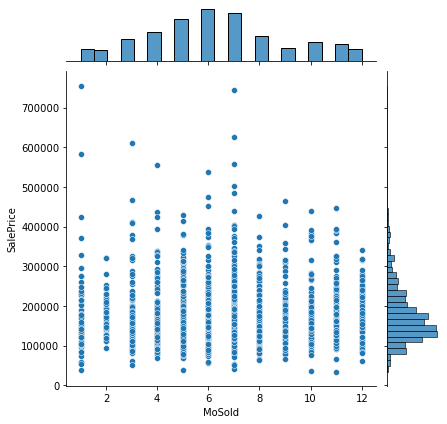

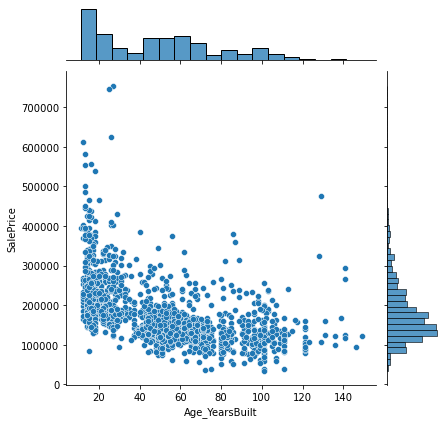

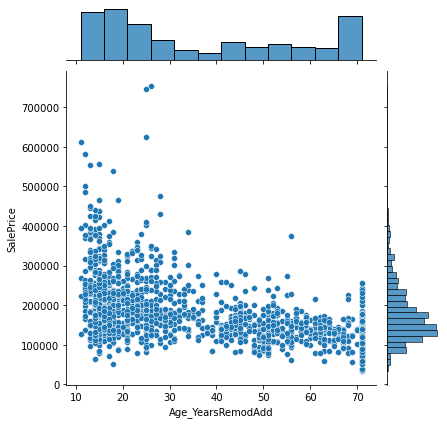

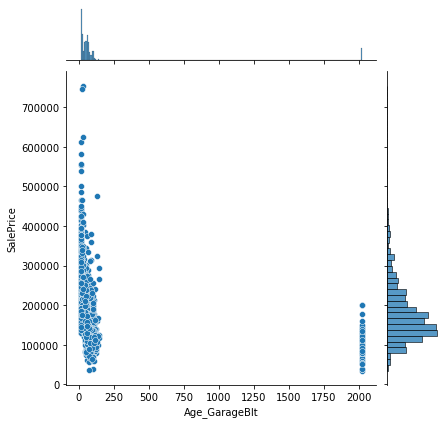

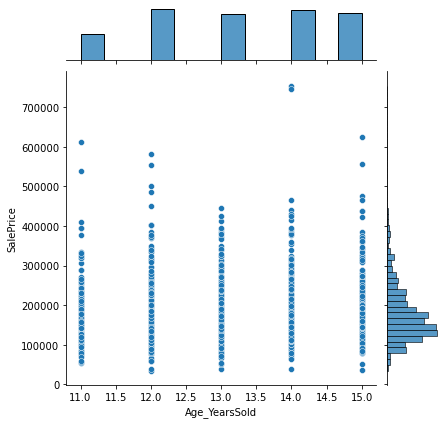

In [29]:
# Define a function to plot numerical-variables
def numerical_vars_plots(index, feature, target):
    plt.figure(index)
    sns.jointplot(x=feature, y=target, data=house_prices_df[[feature, target]])
    
    
# Iterate over the list of numerical-variables to generate their plots against the target-variable
for index, feature_var in enumerate(numerical_vars):
    numerical_vars_plots(index, feature_var, target_var)


We see good linear relationships betweeen SalePrice (target variable) and TotalBsmtSF, 1stFlrSF, GrLivArea etc. So, we can say, at least some linear relationship is present between the predictor and predicted variables.

#### Visualising the catergorical variables:-

<Figure size 432x288 with 0 Axes>

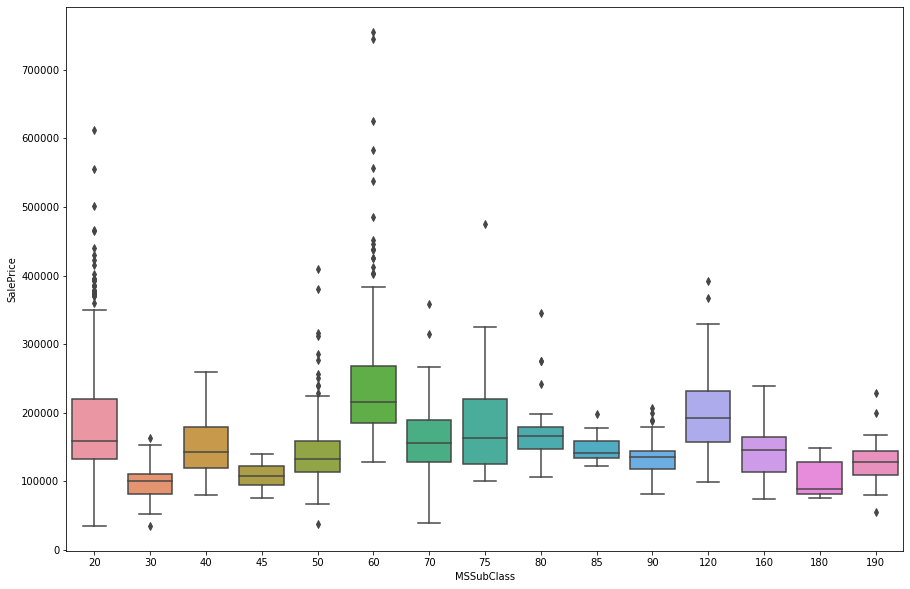

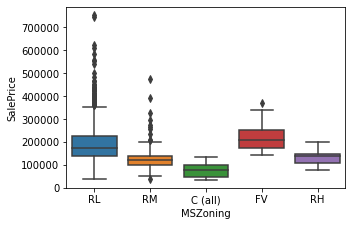

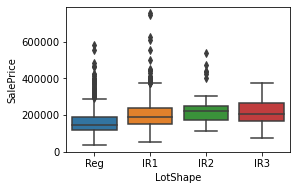

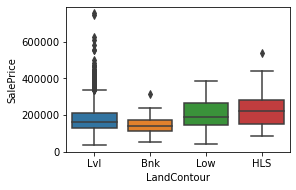

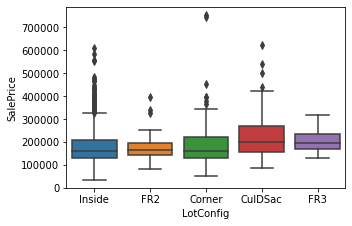

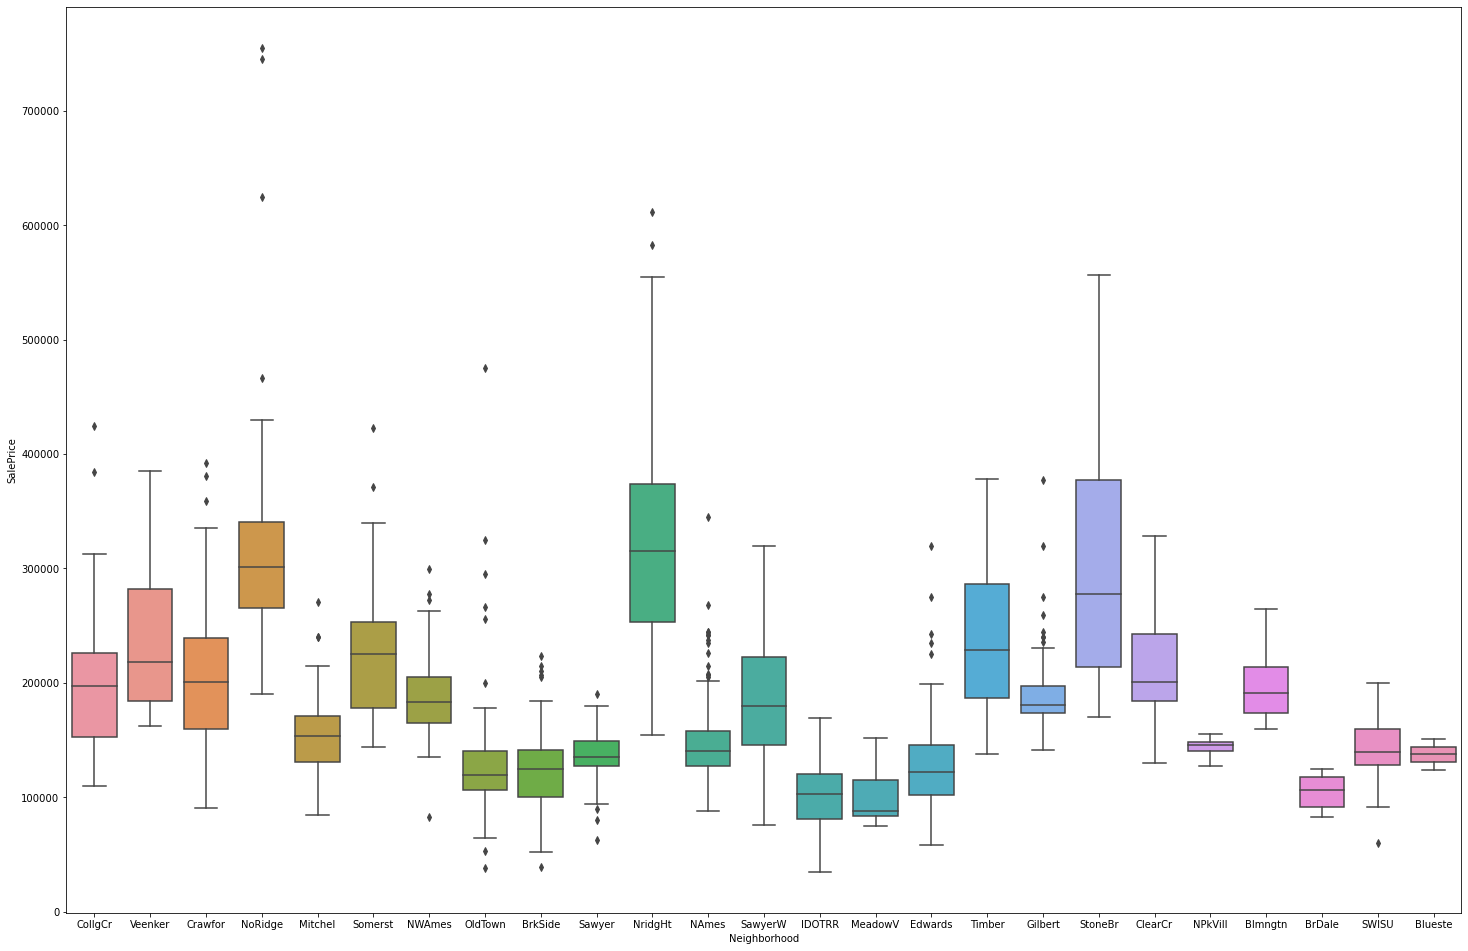

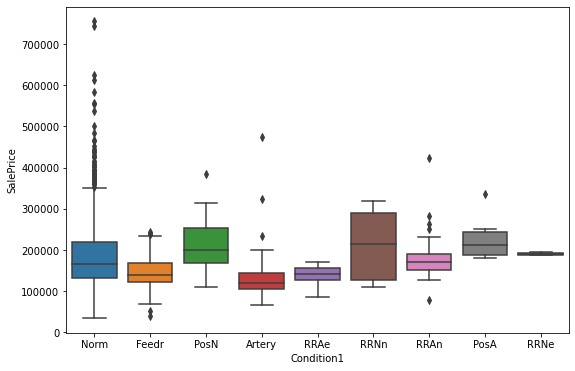

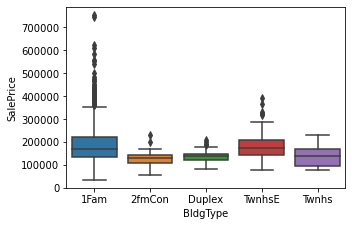

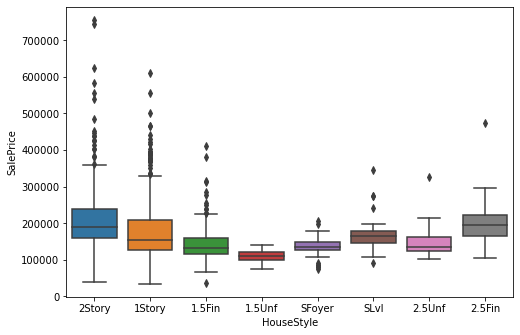

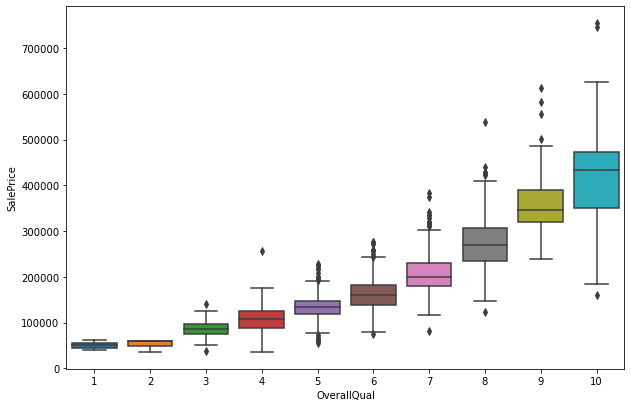

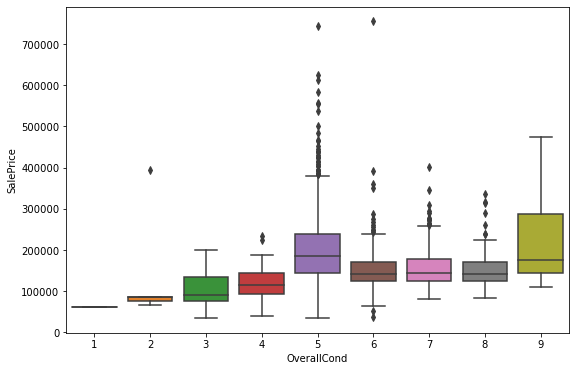

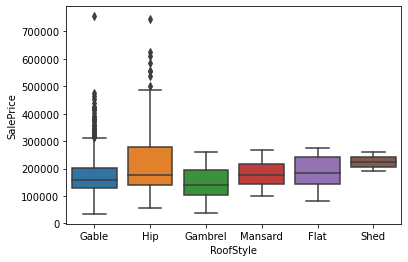

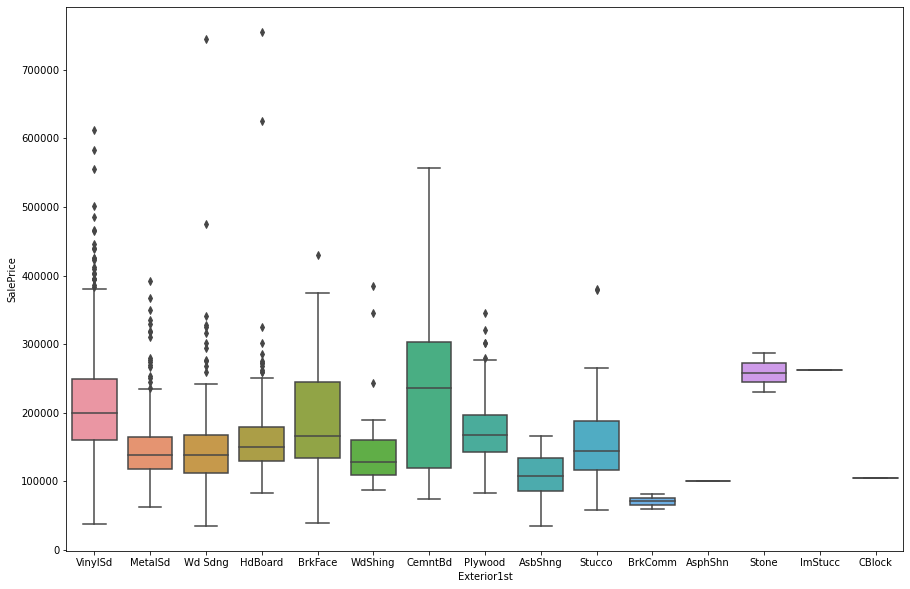

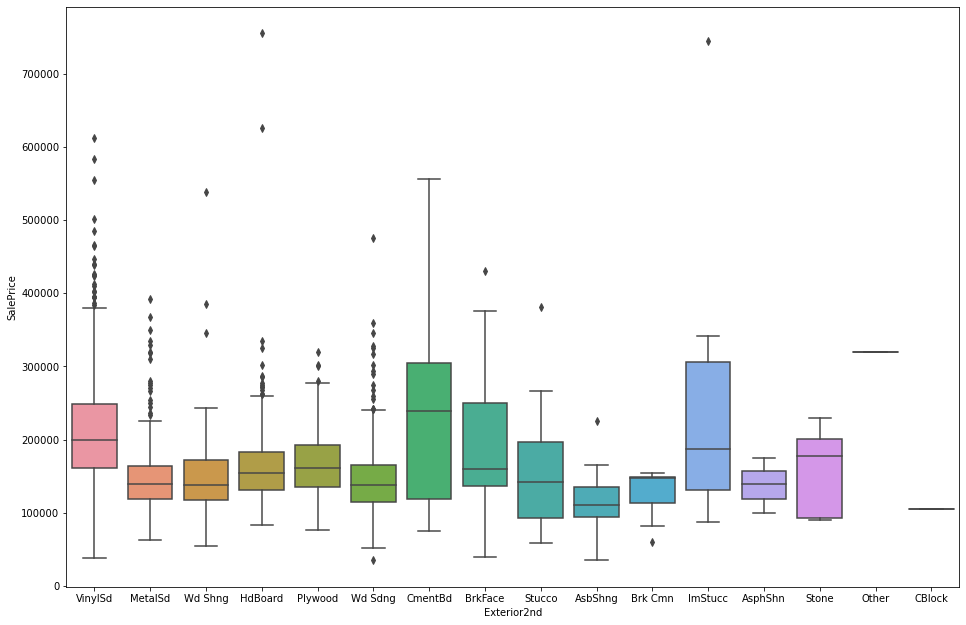

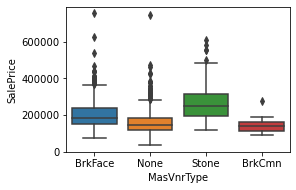

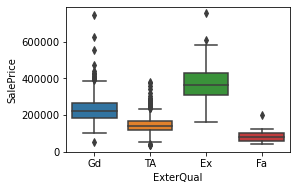

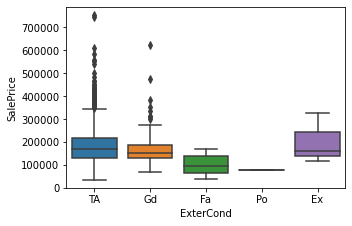

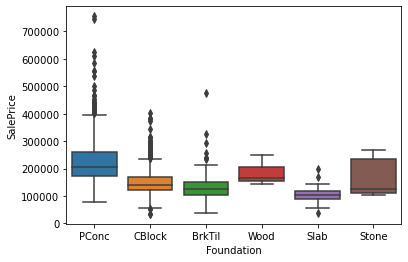

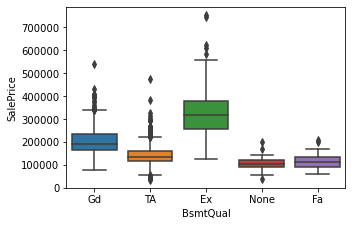

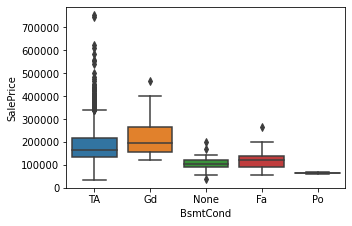

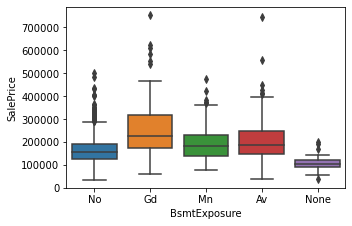

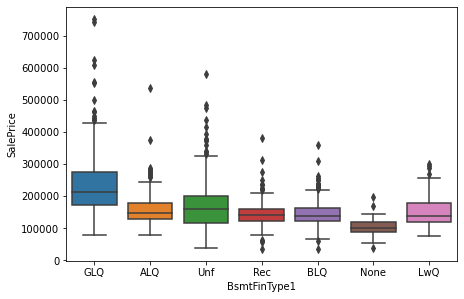

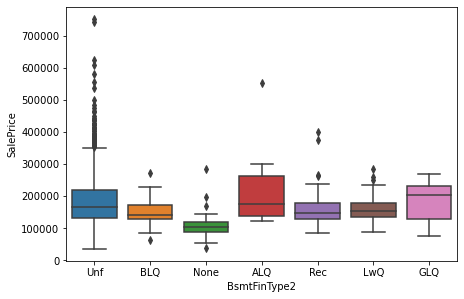

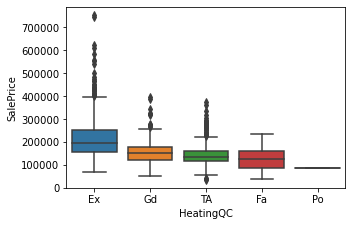

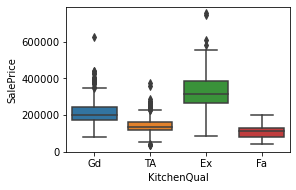

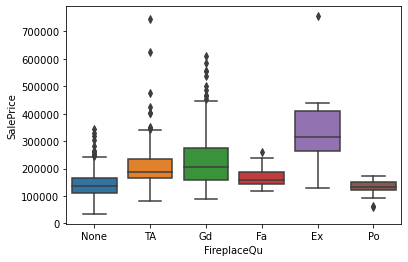

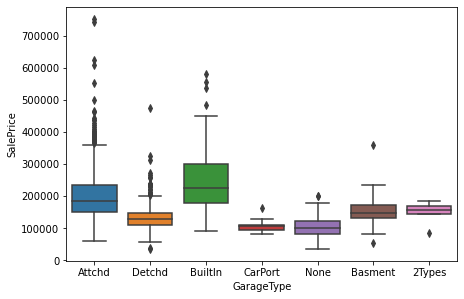

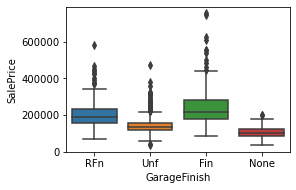

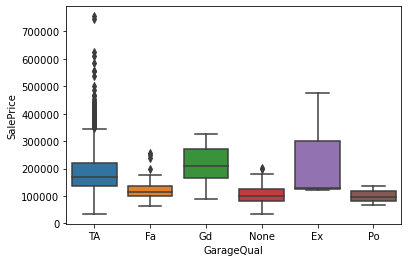

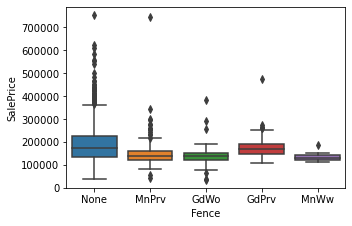

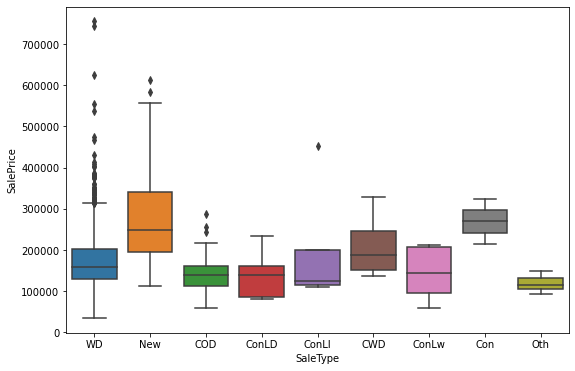

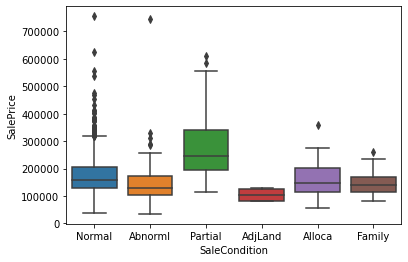

In [30]:
# Define a function to plot categorical-variables
def categorical_vars_plots(index, feature, target):
    plt.figure(index)
    variables = house_prices_df[[feature]].nunique()
    plt.figure(figsize=(variables,variables/1.5))
    sns.boxplot(x=feature, y=target, data=house_prices_df[[feature, target]])
    
# Iterate over the list of numerical-variables to generate their plots against the target-variable
for index, feature_var in enumerate(categorical_vars):
    categorical_vars_plots(index, feature_var, target_var)

From the above plots, we can see the count of SalePrice shows following variations as per cateforical-features:

1. Recorded high for 'New' SateType and 'Partial' SaleCondition.

2. Recorded low for the 'Poor' HeatingQC and 'Poor BsmntCond.

3. Increased in the houses with FireplcaeQC is 'Excellent'.

4. Increased when Exterior1st and Exterior2nd have 'Cmentbd'.

5. Increases significantly for 'StoneBr' and 'NridgHt' Neighborhood.

6. Does not get affected much by 'BsmtFinType1' and 'BsmtFinType2'.

7. Recorded high for MSSubClass being '60' i.e. 2-STORY 1946 & NEWER.


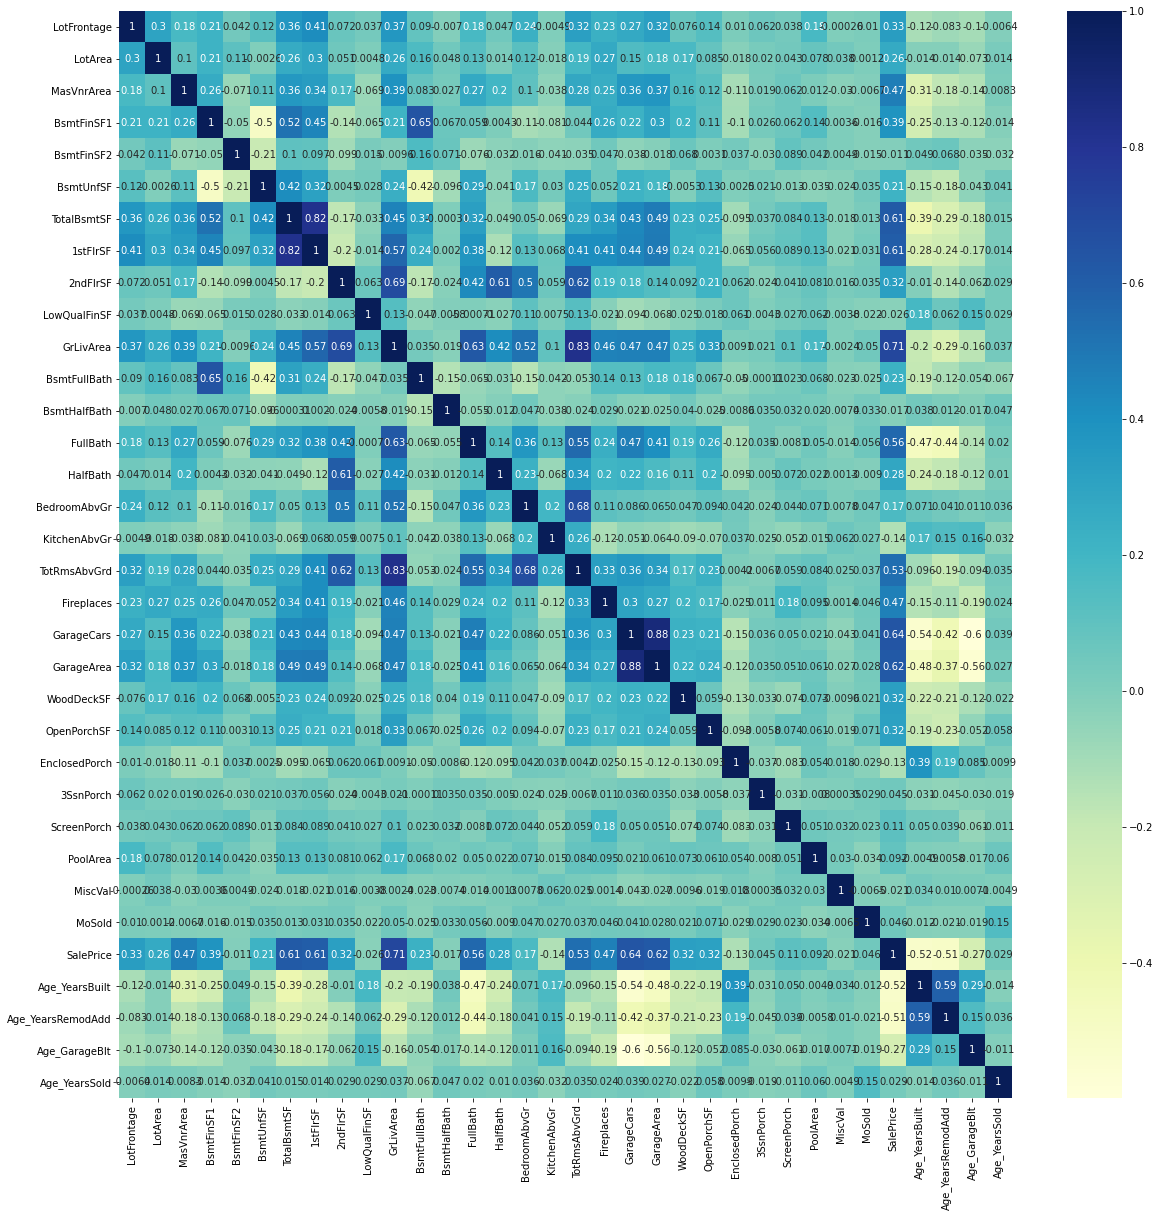

In [31]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize=[20, 20])
sns.heatmap(house_prices_df.corr(), cmap='YlGnBu', annot=True)
plt.show()

In [32]:
# Create a separate dataframe containing only the columns from the  list of numerical feature variables
num_features_df = house_prices_df.loc[:, house_prices_df.columns.isin(numerical_vars)]

# Create a correlation matrixof the numerical feature variables
corr_matrix = num_features_df.corr().abs()

# Select the upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Fetch one from the each pair of features with correlation greater than 0.80
features_highly_correlated = [column for column in upper.columns if any(upper[column] >= 0.80)]

# Display the features-variables with more than 80% correlation among themselevs
features_highly_correlated

['1stFlrSF', 'TotRmsAbvGrd', 'GarageArea']

As we can see from heatmap that the correlation between some predictor columns is very high i.e. more than 0.80 (which is very close to 1), which means these two columns are collinear and keeping both of them will include multicollienarity between the predictor-variables, which is not advisable for linear regression.
So, we decide to drop one columns of each pair.

## Checkpoint 4: Data Preparation for Model Building

Now, we will further clean and tune the data as per the obeservations obtained from EDA as well as from the perspective of model-building requirements.

#### Transform the target-variable to make it normally distributed

In [33]:
house_prices_df['SalePrice']=np.log(house_prices_df['SalePrice'])

#### Reduce multicollinearity:

In [34]:
# Drop the numeric-feature variables (as observed during EDA) to remove multicollinearity issues
house_prices_df = house_prices_df.drop(columns=features_highly_correlated)

#### Check for Outliers:

In [35]:
# Check for outliers in all the numeric predictor variables
house_prices_df.describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,Age_YearsBuilt,Age_YearsRemodAdd,Age_GarageBlt,Age_YearsSold
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,69.863699,10516.828082,103.117123,443.639726,46.549315,567.240411,1057.429452,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,0.613014,1.767123,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,12.024051,49.732192,36.134247,157.500000,13.184247
std,22.027677,9981.264932,180.731373,456.098091,161.319273,441.866955,438.705324,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,0.644666,0.747315,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,0.399452,30.202904,20.645407,452.693368,1.328095
min,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,10.460242,11.000000,11.000000,11.000000,11.000000
25%,60.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,11.775097,21.000000,17.000000,21.000000,12.000000
50%,69.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,1.000000,2.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,12.001505,48.000000,27.000000,49.000000,13.000000
75%,79.000000,11601.500000,164.250000,712.250000,0.000000,808.000000,1298.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,12.273731,67.000000,54.000000,71.000000,14.000000
max,313.000000,215245.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,3.000000,4.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,13.534473,149.000000,71.000000,2021.000000,15.000000


As we can see, the mean and median values for many of the variables are very far from each other each other (i.e. have a huge difference), we can clearly say that such variables contain outliers severly skewing the distribution, so outliers need to be handled.


In [36]:
numeric_cols = ['SalePrice', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'Age_YearsBuilt', 'Age_YearsRemodAdd', 'Age_GarageBlt', 'Age_YearsSold']
def handle_outliers(x):
    list = []
    for col in numeric_cols:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        min_val = Q1-(1.5*IQR)
        max_val = Q3+(1.5*IQR)
        x[col][x[col] < min_val] = min_val
        x[col][x[col] > max_val] = max_val
    return x   

house_prices_df = handle_outliers(house_prices_df)

In [37]:
# Check for the change in satistics after the outliers have been handled
house_prices_df.describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,Age_YearsBuilt,Age_YearsRemodAdd,Age_GarageBlt,Age_YearsSold
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.0,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,69.782226,10295.116712,103.117123,442.466455,46.549315,567.240411,1056.117123,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,0.613014,1.767123,94.244521,46.660274,21.954110,3.349315,15.060959,0.0,27.187671,6.321918,12.024051,49.732192,36.134247,157.500000,13.184247
std,21.223001,6796.295557,180.731373,444.774132,161.319273,441.866955,426.270368,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,0.644666,0.747315,125.338794,66.256028,61.119149,28.353853,55.757415,0.0,168.973696,2.703626,0.399452,30.202904,20.645407,452.693368,1.328095
min,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,10.460242,11.000000,11.000000,11.000000,11.000000
25%,60.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,5.000000,11.775097,21.000000,17.000000,21.000000,12.000000
50%,69.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,1.000000,2.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.0,0.000000,6.000000,12.001505,48.000000,27.000000,49.000000,13.000000
75%,79.000000,11601.500000,164.250000,712.250000,0.000000,808.000000,1298.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.0,0.000000,8.000000,12.273731,67.000000,54.000000,71.000000,14.000000
max,253.525000,82588.850000,1600.000000,3931.025000,1474.000000,2336.000000,4194.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,3.000000,4.000000,857.000000,547.000000,552.000000,420.000000,480.000000,0.0,1750.000000,12.000000,13.534473,149.000000,71.000000,2021.000000,15.000000


#### Feature Encoding the categorical-columns:

• We can see that your dataset has many categorical-columns which are ordinal in nature.

• But in order to fit a regression line, we would need numerical-values instead of strings. Hence, we need to convert them to the numbers, which maintain the ordinality as well as convey the meaning.

• Since there are more than 2 unique categories in such columns, we choose to go with mapping the categories to numerical-values as per the data-dictionary.

In [38]:
house_prices_df['LotShape'] = house_prices_df.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})
house_prices_df['ExterQual'] = house_prices_df.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_prices_df['ExterCond'] = house_prices_df.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_prices_df['BsmtQual'] = house_prices_df.BsmtQual.map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_prices_df['BsmtCond'] = house_prices_df.BsmtCond.map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_prices_df['BsmtExposure'] = house_prices_df.BsmtExposure.map({'None':0,'No':1,'Mn':2,'Av':3,'Gd':4})
house_prices_df['BsmtFinType1'] = house_prices_df.BsmtFinType1.map({'None':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
house_prices_df['BsmtFinType2'] = house_prices_df.BsmtFinType2.map({'None':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
house_prices_df['HeatingQC'] = house_prices_df.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_prices_df['KitchenQual'] = house_prices_df.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_prices_df['GarageFinish'] = house_prices_df.GarageFinish.map({'None':0,'Unf':1,'RFn':2,'Fin':3})
house_prices_df['GarageQual'] = house_prices_df.GarageQual.map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

In [39]:
house_prices_df[['ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2', 'HeatingQC', 'KitchenQual','GarageFinish','GarageQual','ExterCond','LotShape']].head()

,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,GarageFinish,GarageQual,ExterCond,LotShape
0,3,4,3,1,6,1,4,3,2,3,2,3
1,2,4,3,4,5,1,4,2,2,3,2,3
2,3,4,3,2,6,1,4,3,2,3,2,0
3,2,3,4,1,5,1,3,3,1,3,2,0
4,3,4,3,3,6,1,4,3,2,3,2,0


In [40]:
# Have a look at the set of columns and their data-types before proceeding with dummy-encoding
house_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 63 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MSSubClass         1460 non-null   object 
 1   MSZoning           1460 non-null   object 
 2   LotFrontage        1460 non-null   float64
 3   LotArea            1460 non-null   float64
 4   LotShape           1460 non-null   int64  
 5   LandContour        1460 non-null   object 
 6   LotConfig          1460 non-null   object 
 7   Neighborhood       1460 non-null   object 
 8   Condition1         1460 non-null   object 
 9   BldgType           1460 non-null   object 
 10  HouseStyle         1460 non-null   object 
 11  OverallQual        1460 non-null   object 
 12  OverallCond        1460 non-null   object 
 13  RoofStyle          1460 non-null   object 
 14  Exterior1st        1460 non-null   object 
 15  Exterior2nd        1460 non-null   object 
 16  MasVnrType         1460 

#### Dummy Encoding the categorical-columns:

• We can see that your dataset has many columns with values as unordered categories/labels.

• But in order to fit a regression line, we would need numerical-values instead of strings. Hence, we need to convert them to 1s and 0s.

• Since there are more than 2 unique categories in such columns, we choose to go with dummy-encoding to represent them with 1s and 0s.

In [41]:
# Create dummies for unordered catergorical-columns and drop the first dummy-column from dummy_df
dummy_df = pd.get_dummies(house_prices_df[['MSSubClass', 'MSZoning', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'FireplaceQu', 'GarageType', 'Fence', 'SaleType', 'SaleCondition']], drop_first = True)

In [42]:
# Have a look at the dataframe for dummy values
dummy_df.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,

In [43]:
# Check the column-names and data-types in the dataframe for dummy-values
dummy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 155 entries, MSSubClass_30 to SaleCondition_Partial
dtypes: uint8(155)
memory usage: 221.1 KB


In [44]:
# Rename the columns (removing spaces from columns-names) in dummy_df for ease of readability
dummy_df.rename(columns = {'Exterior1st_Wd Sdng':'Exterior1st_Wd_Sdng', 'Exterior2nd_Brk Cmn':'Exterior2nd_Brk_Cmn', 'Exterior2nd_Wd Sdng':'Exterior2nd_Wd_Sdng', 'Exterior2nd_Wd Shng':'Exterior2nd_Wd_Shng'}, inplace = True) 

In [45]:
# Add the resultant dummy dataframe to the original dataframe
house_prices_df = pd.concat([house_prices_df, dummy_df], axis=1)

In [46]:
# Have a look at the complete data-set after inclusion of columns with dummy-values
house_prices_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,Age_YearsBuilt,Age_YearsRemodAdd,Age_GarageBlt,Age_YearsSold,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd_Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk_Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd_Sdng,Exterior2nd_Wd_Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,RL,65.0,8450.0,3,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,3,2,PConc,4,3,1,6,706.0,1,0,150,856,4,854,0,1710,1,0,2,1,3,1,3,0,None,Attchd,2,2,3,0,61,0,0,0,0,None,0,2,WD,Normal,12.247694,18,18,18,13,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,RL,80.0,9600.0,3,Lvl,FR2,Veenker,Feedr,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,2,2,CBlock,4,3,4,

In [47]:
# Drop the original columns for which dummies have been created
house_prices_df = house_prices_df.drop(columns=['MSSubClass', 'MSZoning', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'FireplaceQu', 'GarageType', 'Fence', 'SaleType', 'SaleCondition'])

In [48]:
# Have a look at the final data-set
house_prices_df.head()

,LotFrontage,LotArea,LotShape,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,GarageFinish,GarageCars,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,Age_YearsBuilt,Age_YearsRemodAdd,Age_GarageBlt,Age_YearsSold,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd_Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk_Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd_Sdng,Exterior2nd_Wd_Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450.0,3,196.0,3,2,4,3,1,6,706.0,1,0,150,856,4,854,0,1710,1,0,2,1,3,1,3,0,2,2,3,0,61,0,0,0,0,0,2,12.247694,18,18,18,13,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,80.0,9600.0,3,0.0,2,2,4,3,4,5,978.0,1,0,284,1262,4,0,0,1262,0,1,2,0,3,1,2,1,2,2,3,298,0,0,0,0,0,0,5,12.109011,45,45,45,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2

In [49]:
# Check the number of observations in the final-dataset
house_prices_df.shape

(1460, 198)

In [50]:
# Check the column-names, column-data-types and null-values in the final-dataset

house_prices_df.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 198 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   LotFrontage            float64
 1   LotArea                float64
 2   LotShape               int64  
 3   MasVnrArea             float64
 4   ExterQual              int64  
 5   ExterCond              int64  
 6   BsmtQual               int64  
 7   BsmtCond               int64  
 8   BsmtExposure           int64  
 9   BsmtFinType1           int64  
 10  BsmtFinSF1             float64
 11  BsmtFinType2           int64  
 12  BsmtFinSF2             int64  
 13  BsmtUnfSF              int64  
 14  TotalBsmtSF            int64  
 15  HeatingQC              int64  
 16  2ndFlrSF               int64  
 17  LowQualFinSF           int64  
 18  GrLivArea              int64  
 19  BsmtFullBath           int64  
 20  BsmtHalfBath           int64  
 21  FullBath               int64  
 22  HalfBath               

Now, we have the final dataset which is reformatted, cleaned and prepared to be used for building a model.

So we can go ahead and extract the training and test data by splitting this final dataset

## Checkpoint 5: Splitting the Data into Training and Testing Sets

Now we will begin with the first basic step for regression, which is performing a train-test split.

In [51]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
# Split the final-dataset in to 70% (training-set) and 30% (test-set) parts
house_prices_df_train, house_prices_df_test = train_test_split(house_prices_df, train_size=0.7, test_size=0.3, random_state=100)

#### Rescaling the Features:

As we could see from the data, that the values for some variables are on a different scale, while for other-variables they are in 1s and 0. It is very important to rescale the variables so that they have a comparable scale, to avoid confusion during model evaluation.

So, we decided to Rescale the numeric-variables (except dummy variables) to get the units of all the coefficients obtained on the same scale.

We choose MinMax scaling for this, as it would be more convenient to analyse as compared to Standardisation in this case.

#### MinMax Scaling:

In [52]:
# Create a MinMaxScaler object
scaler_obj = MinMaxScaler()

In [53]:
# Apply scaler on the numeric-variables (except dummy-variables) in the training-dataset
rescale_var_list = list(house_prices_df_train.dtypes[(house_prices_df_train.dtypes!='uint8')].index)
house_prices_df_train[rescale_var_list] = scaler_obj.fit_transform(house_prices_df_train[rescale_var_list])

In [54]:
# Have a look at the rescaled-values in the data-set
house_prices_df_train.head()

,LotFrontage,LotArea,LotShape,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,GarageFinish,GarageCars,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,Age_YearsBuilt,Age_YearsRemodAdd,Age_GarageBlt,Age_YearsSold,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd_Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk_Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd_Sdng,Exterior2nd_Wd_Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
210,0.197828,0.050880,1.0,0.00,0.333333,0.333333,0.6,0.75,0.25,0.500000,0.119053,0.166667,0.0,0.169521,0.206009,0.50,0.000000,0.0,0.081860,0.333333,0.0,0.333333,0.0,0.250,0.0,0.333333,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.173913,0.0,0.0,0.0,0.0,0.272727,0.335850,0.615942,1.000000,1.000000,0.50,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
318,0.296742,0.103844,1.0,0.16,0.666667,0.333333,0.8,0.75,1.00,1.000000,0.251080,0.166667,0.0,0.154110,0.321173,1.00,0.616949,0.0,0.424289,0.333333,0.0,0.666667,0.5,0.500,0.0,0.666667,0.333333,0.666667,0.75,0.6,0.396733,0.114723,0.260870,0.0,0.0,0.0,0.0,0.2

In [55]:
# Verify if the min and max values are 0 and 1, respectively for all the rescaled variables
house_prices_df_train.describe()

,LotFrontage,LotArea,LotShape,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,GarageFinish,GarageCars,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,Age_YearsBuilt,Age_YearsRemodAdd,Age_GarageBlt,Age_YearsSold,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd_Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk_Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd_Sdng,Exterior2nd_Wd_Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.0,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.0

We can clearly see, that the minimum-value for all variables is 0 and the maximum-value for all the variables is 1, so, all the variables are on the same scale in our data-set.

Now, let's check the correlation between variables, to see which variables are highly correlated and to get a sense of what we can expect from the model.

In [56]:
# Have a look at the high correlarions among feature-variables themselves

# Create a separate dataframe containing only the feature variables
num_features_df_train = house_prices_df_train.loc[ : , house_prices_df_train.columns != 'SalePrice']

# Create a correlation matrix of the feature variables
corr_matrix_train = num_features_df_train.corr().abs()

# Select the upper triangle of the correlation matrix
upper_train = corr_matrix_train.where(np.triu(np.ones(corr_matrix_train.shape), k=1).astype(np.bool))

# Fetch one from the each pair of features with correlation greater than 0.80
features_highly_correlated_train = [column for column in upper_train.columns if any(upper_train[column] > 0.80)]

features_highly_correlated_train

['Age_GarageBlt',
 'MSZoning_RM',
 'Neighborhood_Somerst',
 'BldgType_2fmCon',
 'BldgType_Duplex',
 'HouseStyle_1.5Unf',
 'HouseStyle_2Story',
 'HouseStyle_SLvl',
 'RoofStyle_Hip',
 'Exterior2nd_AsphShn',
 'Exterior2nd_CBlock',
 'Exterior2nd_CmentBd',
 'Exterior2nd_HdBoard',
 'Exterior2nd_MetalSd',
 'Exterior2nd_VinylSd',
 'Exterior2nd_Wd_Sdng',
 'FireplaceQu_None',
 'GarageType_None',
 'SaleCondition_Partial']

In [57]:
# Drop the feature variables (as observed having correlation greater than 0.8) to remove multicollinearity issues
house_prices_df_train = house_prices_df_train.drop(columns=features_highly_correlated_train)

In [58]:
# Analyse the correlation-values of all features with respect to the target-variable


# Create a correlation matrix of the target variable with feature variables
corr_matrix_target_train = house_prices_df_train.corrwith(house_prices_df_train['SalePrice']).abs().sort_values(ascending=False)


In [59]:
# Fetch the features with correlation greater than 50% with the target variable
high_feature_target_corr_train = corr_matrix_target_train[corr_matrix_target_train > 0.5]
high_feature_target_corr_train

SalePrice            1.000000
GrLivArea            0.686358
KitchenQual          0.672177
ExterQual            0.671375
GarageCars           0.661640
TotalBsmtSF          0.635363
GarageFinish         0.618607
BsmtQual             0.610133
Age_YearsBuilt       0.599878
FullBath             0.576433
Age_YearsRemodAdd    0.572025
Foundation_PConc     0.536365
Fireplaces           0.510529
dtype: float64

In [60]:
# Fetch the features with correlation less than 1% with the target variable
low_feature_target_corr_train = corr_matrix_target_train[corr_matrix_target_train < 0.01]
low_feature_target_corr_train

SaleType_ConLw          0.009583
Neighborhood_Blueste    0.007673
BsmtHalfBath            0.007570
Condition1_RRAn         0.007358
RoofStyle_Mansard       0.006345
Condition1_RRNn         0.005518
Foundation_Stone        0.003939
MSSubClass_75           0.003638
FireplaceQu_Fa          0.002856
LotConfig_FR3           0.002549
MSSubClass_80           0.001344
dtype: float64

In general, this heatmap details which predictor-variables are multicollinear in nature, and which predictor-variables have high collinearity with the target-variable.

We would be referring to this heatmap back-and-forth while building the linear model in order to validate various correlated values along with VIFs & p-values, for identifying the correct predictor-variable to be selected/eliminateed from the model.

We can see from the heatmap, that the top-3 collinear predictor-variables with bike_rental_count (target-variable) are:-

1. temperature (0.64)

2. year (0.59)

3. Fall_season (0.37)

So, from this, we can expect these to be shorlisted at least in the first few-iterations of our model-building.
Let's start building the model now.

## Checkpoint 6: Shortlisting predictors through Recursive Feature Elimination

Since we have total 29 columns (28 predictor-variables and 1 target-variable), we decide to take a balanced approach towards model-building.
So, we would first shortlist the top-15 most significant predictor-variables through Recursive Feature Elimination and from there onward, we will build the model through statsmodel library and analyse its various summary parameters to manually select or eliminate the features in order to reach the line of best-fit. 

#### Dividing the training-set into X and Y sets for model building

In [61]:
# Divide the training set with respect to predictors and target variable
y_train = house_prices_df_train.pop('SalePrice')
X_train = house_prices_df_train

#### Recursive feature elimination:

We will use the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn).

In [62]:
# Instantiate a LinearRegression Object
lm = LinearRegression()

# Run Linear Regression (learn)
lm.fit(X_train, y_train)

# Create an object of RFE with the output number of predictor-variables equal to 80
rfe_obj = RFE(lm, 80)

# Run RFE 
rfe_obj = rfe_obj.fit(X_train, y_train)

In [63]:
# List the columns selected by RFE along with their weights
list(zip(X_train.columns, rfe_obj.support_, rfe_obj.ranking_))

[('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('LotShape', False, 59),
 ('MasVnrArea', False, 94),
 ('ExterQual', False, 93),
 ('ExterCond', False, 79),
 ('BsmtQual', False, 68),
 ('BsmtCond', True, 1),
 ('BsmtExposure', False, 16),
 ('BsmtFinType1', False, 47),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinType2', False, 23),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('HeatingQC', False, 21),
 ('2ndFlrSF', False, 82),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', False, 88),
 ('FullBath', True, 1),
 ('HalfBath', False, 13),
 ('BedroomAbvGr', False, 48),
 ('KitchenAbvGr', True, 1),
 ('KitchenQual', False, 12),
 ('Fireplaces', True, 1),
 ('GarageFinish', False, 70),
 ('GarageCars', True, 1),
 ('GarageQual', True, 1),
 ('WoodDeckSF', True, 1),
 ('OpenPorchSF', False, 83),
 ('EnclosedPorch', True, 1),
 ('3SsnPorch', True, 1),
 ('ScreenPorch', True, 1),
 ('PoolArea', True, 1),
 ('MiscVal', False, 50),
 ('M

In [64]:
# Fetch and store the list of top-80 columns selected by RFE
top_80_col = X_train.columns[rfe_obj.support_]
top_80_col

Index(['LotFrontage', 'LotArea', 'BsmtCond', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'GarageQual',
       'WoodDeckSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'Age_YearsBuilt', 'Age_YearsRemodAdd', 'MSSubClass_30',
       'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'Neighborhood_Blueste',
       'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_Sawyer', 'Neighborhood_StoneBr',
       'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRNn',
       'OverallQual_2', 'OverallQual_3', 'OverallQual_4', 'OverallQual_5',
       'OverallQual_6', 'OverallQual_7', '

In [65]:
# Subset the training set to the top_80 columns shortlisted by RFE
X_train = X_train[top_80_col]
X_train.shape

(1021, 80)

#### Applying the scaling on the test sets

In [66]:
# Apply scaler on the feature-variables in the test-dataset
rescale_var_list = list(house_prices_df_test.dtypes[(house_prices_df_test.dtypes!='uint8')].index)
house_prices_df_test[rescale_var_list] = scaler_obj.transform(house_prices_df_test[rescale_var_list])

In [67]:
# Have a look at the rescaled-values in test-set
house_prices_df_test.head()

,LotFrontage,LotArea,LotShape,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,GarageFinish,GarageCars,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,Age_YearsBuilt,Age_YearsRemodAdd,Age_GarageBlt,Age_YearsSold,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd_Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk_Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd_Sdng,Exterior2nd_Wd_Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1436,0.167724,0.092748,1.0,0.00000,0.333333,0.333333,0.6,0.75,0.25,0.833333,0.156702,0.166667,0.0,0.106164,0.206009,0.50,0.000000,0.0,0.081860,0.000000,0.0,0.333333,0.0,0.375,0.0,0.333333,0.000000,0.333333,0.50,0.6,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.363636,0.403081,0.282609,0.650000,0.019403,0.75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
57,0.292442,0.125358,0.0,0.00000,0.666667,0.333333,0.8,0.75,0.25,0.166667,0.000000,0.166667,0.0,0.368151,0.205055,1.00,0.416465,0.0,0.246349,0.000000,0.0,0.666667,0.5,0.375,0.0,0.666667,0.000000,0.666667,0.50,0.6,0.000000,0.133843,0.0,0.0,0.0,0.0,0.0,0.63636

In [68]:
# Verify if the min and max values are 0 and 1, respectively for all the rescaled variables
house_prices_df_test.describe()

,LotFrontage,LotArea,LotShape,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,GarageFinish,GarageCars,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,Age_YearsBuilt,Age_YearsRemodAdd,Age_GarageBlt,Age_YearsSold,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd_Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk_Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd_Sdng,Exterior2nd_Wd_Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.0,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,4

#### Dividing the test-set into X and Y sets for model building

In [69]:
# Divide the test set with respect to predictors and target variable
y_test = house_prices_df_test.pop('SalePrice')
X_test = house_prices_df_test

In [70]:
# Subset the data-frame to only those columns which have been shortlisted in out final model
X_test = X_test[top_80_col]
X_test.shape

(438, 80)

## Checkpoint 7: Building a Linear Regression Model

In [71]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [72]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

0.1915639517718959
[ 2.39400668e-02  7.43019673e-02  1.86700834e-02 -1.39975154e+01
 -5.27574663e+00 -8.36543771e+00  1.51445570e+01 -4.00932959e-02
  4.30226028e-01  4.13949013e-02  1.38988327e-02 -5.06252631e-02
  2.93427393e-02  5.63481696e-02  2.21325380e-02  2.49459428e-02
  1.95029828e-02  3.15657346e-02  2.75454838e-02 -1.30835578e+11
 -9.92148940e-02 -2.63055343e-02 -3.31085011e-02 -3.91964973e-02
 -9.95921028e-03 -1.54252432e-02  4.51840847e-02  2.42781378e-02
  1.67185156e-02  2.80546135e-02  1.55888986e-02  3.14200730e-02
 -3.08859650e-02 -2.75023162e-02 -5.14485204e-02 -1.53850934e-02
 -1.29437290e-02 -1.56930500e-02  1.77793561e-02 -1.97641291e-02
 -2.13453308e-02  1.77999872e-02 -4.23383407e-02 -2.89918959e-02
  1.20759303e-02 -1.46287754e+11 -1.46287754e+11 -1.46287754e+11
 -1.46287754e+11 -1.46287754e+11 -1.46287754e+11 -1.46287754e+11
 -1.46287754e+11 -1.46287754e+11  1.46287754e+11  1.46287754e+11
  1.46287754e+11  1.46287754e+11  1.46287754e+11  1.46287754e+11
  1.46

In [73]:
# Verify the metrics based on train and test predictions
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.929241197489179
-2.8063576368613603e+21
1.201604501636932
2.140010746805986e+22
0.001176889815511197
4.885869284945174e+19


## Checkpoint 8: Regularisation (Hyperparameter Tuning)

#### Define alpha and folds for both Ridge and Lasso Regression

In [74]:
# Hyperparameter (alpha/lambda) values
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# Folds for cross validation
folds  = KFold(n_splits=10, shuffle=True, random_state=100)

## Ridge Regression

In [75]:
ridge = Ridge()

model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    4.9s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=100, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [76]:
# Have a look at the the best value for hyperparameter (alpha)
print(model_cv.best_params_)

{'alpha': 1.0}


In [77]:
#Fitting Ridge model for alpha = 1.0 and printing coefficients which have been penalised
alpha = 1.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-0.00165136  0.03794597  0.03496641  0.05940149  0.00860754  0.00659575
  0.0872618  -0.02452766  0.28682325  0.04710185  0.05553819 -0.04098536
  0.03601346  0.08500934  0.01296872  0.03529793  0.02230634  0.02670684
  0.03229464  0.         -0.06896215 -0.03034658 -0.04526847 -0.04395564
 -0.01985453 -0.01256905  0.04421759  0.02583854  0.02205229  0.00429606
  0.02614668  0.03216731 -0.03656902 -0.03105849 -0.04567629 -0.01531634
 -0.01235288 -0.0160884   0.02140228 -0.02447923 -0.02118904  0.01222944
 -0.02442527 -0.0217628   0.00401117 -0.1098455  -0.02810543 -0.02328931
 -0.01473759 -0.00404525  0.02071759  0.05828112  0.10041487  0.06162333
 -0.0155761  -0.0569358  -0.01027106  0.00342844  0.02180893  0.03258358
  0.03096815  0.05500769  0.02204857 -0.02136046  0.03062008 -0.00474627
  0.          0.02157604 -0.00149911 -0.02789021 -0.02197957  0.02257228
  0.02288901  0.04703873  0.00278464  0.03245066  0.03406658  0.00774706
  0.02710454  0.01848354]


In [78]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9039670277392977
0.8769778974987568
1.6308027790095452
0.9381150071156595
0.0015972603124481343
0.0021418150847389485


In [79]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = X_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feature-Variable','Coefficient-Value']
ridge_coef.sort_values(by='Coefficient-Value',ascending=False).head(10)

,Feature-Variable,Coefficient-Value
9,BsmtFullBath,0.286823
0,LotFrontage,0.276304
53,OverallQual_10,0.100415
7,LowQualFinSF,0.087262
14,GarageQual,0.085009
54,OverallCond_2,0.061623
4,BsmtFinSF2,0.059401
52,OverallQual_9,0.058281
11,KitchenAbvGr,0.055538
62,RoofStyle_Mansard,0.055008


## Lasso Regression

In [80]:
lasso = Lasso()

# Grid Search Cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    5.3s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=100, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [81]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [82]:
#Fitting Lasso model for alpha = 0.0001 and printing coefficients which have been penalised

alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [83]:
lasso.coef_

array([-0.        ,  0.01682532,  0.03295021,  0.04203   ,  0.        ,
       -0.        ,  0.09757046, -0.02250914,  0.35113765,  0.04739699,
        0.04072355, -0.04793093,  0.03340862,  0.0832759 ,  0.00805617,
        0.03195805,  0.01228242,  0.01163572,  0.02584156,  0.        ,
       -0.07577306, -0.03206207, -0.03904519, -0.04309454, -0.00216468,
       -0.00281996,  0.04327915,  0.01657728,  0.02189992,  0.        ,
        0.02689145,  0.03261971, -0.0341659 , -0.02813155, -0.04746685,
       -0.00866939, -0.00876509, -0.01169527,  0.02106244, -0.02145194,
       -0.01769081,  0.00590148, -0.02139406, -0.01493864,  0.        ,
       -0.10713768, -0.02045018, -0.01904081, -0.00963027,  0.        ,
        0.02485584,  0.06038775,  0.1026063 ,  0.05330805, -0.        ,
       -0.0575737 , -0.01323045, -0.        ,  0.01713607,  0.02846804,
        0.02587947,  0.04270837,  0.00434613, -0.        ,  0.03027503,
       -0.        ,  0.        ,  0.        , -0.        , -0.01

In [84]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9021979721546615
0.8798963461184669
1.6608443438568288
0.9158601407787885
0.001626683980271135
0.0020910048876228047


In [85]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Feature-Variable','Coefficient-Value']
lasso_coef.sort_values(by='Coefficient-Value',ascending=False).head(10)

,Feature-Variable,Coefficient-Value
9,BsmtFullBath,0.351138
0,LotFrontage,0.289752
53,OverallQual_10,0.102606
7,LowQualFinSF,0.097570
14,GarageQual,0.083276
52,OverallQual_9,0.060388
54,OverallCond_2,0.053308
10,FullBath,0.047397
27,MSZoning_RH,0.043279
62,RoofStyle_Mansard,0.042708


## Checkpoint 9: Model Evaluation

In [86]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)', 'MSE (Train)','MSE (Test)'], 'Linear Regression': metric}

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.292412e-01,0.903967,0.902198
1,R2 Score (Test),-2.806358e+21,0.876978,0.879896
2,RSS (Train),1.201605e+00,1.630803,1.660844
3,RSS (Test),2.140011e+22,0.938115,0.915860
4,MSE (Train),3.430583e-02,0.039966,0.040332
5,MSE (Test),6.989899e+09,0.046280,0.045728


In [87]:
betas = pd.DataFrame(index=X_train.columns)

In [88]:
betas.rows = X_train.columns

In [89]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [90]:
pd.set_option('display.max_rows', None)
betas.head(80)

,Linear,Ridge,Lasso
LotFrontage,2.394007e-02,-0.001651,-0.000000
LotArea,7.430197e-02,0.037946,0.016825
BsmtCond,1.867008e-02,0.034966,0.032950
BsmtFinSF1,-1.399752e+01,0.059401,0.042030
BsmtFinSF2,-5.275747e+00,0.008608,0.000000
BsmtUnfSF,-8.365438e+00,0.006596,-0.000000
TotalBsmtSF,1.514456e+01,0.087262,0.097570
LowQualFinSF,-4.009330e-02,-0.024528,-0.022509
GrLivArea,4.302260e-01,0.286823,0.351138
BsmtFullBath,4.139490e-02,0.047102,0.047397


#### Inferences from Model-Evaluations:
    
The models has been evaluated to be performing fine on various parameters like R2 Score, Mean Squared Error and spread of Actual Vs Precited values of target-variables.

This implies that we have models that seem good enough to predict the SalePrice with respect to the change in the predictor-variables shortlisted in the final-model.

## Conclusions:

Though the r2_scores are approximately same for both of them, but Lasso will penalize more on the dataset and can also help in feature elimination by making coefficients of lesser significant predictors equal to zero.

So, we will consider the Lasso as our final model.

The top 5 most significant feature variables are:

    1. BsmtFullBath
    2. LotFrontage
    3. OverallQual_10
    4. LowQualFinSF
    5. GarageQual 


All these features have positive coefficients, which means an incease in their value leads to a significant increase in SalePrice (target-variable)
